In [2]:
#import libraries
#Data Analysis
import pandas as pd
import numpy as np

#Visuals and visual controls
import matplotlib.pyplot as plt
import seaborn as sns

#ML and Statistics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor # Tree Regressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures # To normalise the data
from sklearn.model_selection import train_test_split # Allow for splitting the data into training and test sets
import scipy.stats as st # Used for statistical analysis such as hypothesis and chi-square testing
from sklearn.preprocessing import StandardScaler # normalise the dataset
import statsmodels.api as sm
# calculate an accuracy metric and an error metric
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
ticket_df = pd.read_csv('railway.csv')

## Change Data Types

In [5]:
# Review df and data types
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [6]:
ticket_df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [7]:
# Handle time columns
ticket_df['Time of Purchase'] = pd.to_datetime(ticket_df['Time of Purchase'],format='%H:%M:%S')
ticket_df['Departure Time'] = pd.to_datetime(ticket_df['Departure Time'],format='%H:%M:%S')
ticket_df['Arrival Time'] = pd.to_datetime(ticket_df['Arrival Time'],format='%H:%M:%S')
ticket_df['Actual Arrival Time'] = pd.to_datetime(ticket_df['Actual Arrival Time'],format='%H:%M:%S')

In [8]:
# Handle the date columns
ticket_df['Date of Purchase'] = pd.to_datetime(ticket_df['Date of Purchase'])
ticket_df['Date of Journey'] = pd.to_datetime(ticket_df['Date of Journey'])

In [9]:
# validate changes
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  datetime64[ns]
 2   Time of Purchase     31653 non-null  datetime64[ns]
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             10735 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  datetime64[ns]
 12  Departure Time       31653 non-null  datetime64[ns]
 13  Arrival Time         31653 non-

## Handle Missing Data

In [11]:
# Handle Missing Data
ticket_df['Reason for Delay'].value_counts(dropna=False)

Reason for Delay
NaN                   27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: count, dtype: int64

In [12]:
# verify why there are NaN values in journey status
ticket_df['Journey Status'].loc[ticket_df['Reason for Delay'].isna()].value_counts()

Journey Status
On Time    27481
Name: count, dtype: int64

In [13]:
# verify that the NaN values are on time trains
on_time_sample = 27481
total_sample = 31653
total_sample - on_time_sample

4172

In [14]:
# replace NaN with 'No Delay'
ticket_df['Reason for Delay'] = ticket_df['Reason for Delay'].fillna('No Delay')

In [15]:
# Validate outcome
ticket_df['Reason for Delay'].value_counts(dropna=False)

Reason for Delay
No Delay              27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: count, dtype: int64

In [16]:
# move on to actual arrival time.
# These will be blank because they may be cancelled trains
ticket_df['Journey Status'].value_counts()

Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64

In [17]:
# check that delayed and cancelled sample equate to missing data count
ticket_df['Journey Status'].loc[ticket_df['Actual Arrival Time'].isna()].value_counts()

Journey Status
Cancelled    1880
Name: count, dtype: int64

In [18]:
# replace the NaN with expected time of arrival value
filter_na = ticket_df['Actual Arrival Time'].isna()
ticket_df['Actual Arrival Time'] = np.where(filter_na,ticket_df['Arrival Time'],ticket_df['Actual Arrival Time'])


In [19]:
#valiate cleaning process
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  datetime64[ns]
 2   Time of Purchase     31653 non-null  datetime64[ns]
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             10735 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  datetime64[ns]
 12  Departure Time       31653 non-null  datetime64[ns]
 13  Arrival Time         31653 non-

In [20]:
# HAndle missing data in railcard
ticket_df['Railcard'] = ticket_df['Railcard'].fillna('None')

## Handle Inconsistent Categorical Data

In [22]:
# There were multiple categories in reason for delay that could be put into one. This will be changed
ticket_df['Reason for Delay'].value_counts(dropna=False)

Reason for Delay
No Delay              27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: count, dtype: int64

In [23]:
# change the categorical data
map_classifiers = {'No Delay':'No Delay',
                   'Weather':'Weather',
                   'Technical Issue':'Technical Issue',
                   'Signal Failure':'Signal Failure',
                   'Signal failure':'Signal Failure',
                   'Staffing':'Staff Shortage',
                   'Staff Shortage':'Staff Shortage',
                   'Weather Conditions':'Weather',
                   'Traffic':'Traffic'}

ticket_df['Reason for Delay'] = ticket_df['Reason for Delay'].map(map_classifiers)

In [24]:
# Validate results
ticket_df['Reason for Delay'].value_counts(dropna=False)

Reason for Delay
No Delay           27481
Weather             1372
Signal Failure       970
Staff Shortage       809
Technical Issue      707
Traffic              314
Name: count, dtype: int64

In [25]:
# Check other categorical data columns
ticket_df.nunique()

Transaction ID         31653
Date of Purchase         128
Time of Purchase       24351
Purchase Type              2
Payment Method             3
Railcard                   4
Ticket Class               2
Ticket Type                3
Price                    125
Departure Station         12
Arrival Destination       32
Date of Journey          121
Departure Time            96
Arrival Time             203
Actual Arrival Time      623
Journey Status             3
Reason for Delay           6
Refund Request             2
dtype: int64

In [26]:
# Check railcard
ticket_df['Railcard'].value_counts(dropna=False)

Railcard
None        20918
Adult        4846
Disabled     3089
Senior       2800
Name: count, dtype: int64

In [27]:
# Check Departure Station
ticket_df['Departure Station'].value_counts()

Departure Station
Manchester Piccadilly    5650
London Euston            4954
Liverpool Lime Street    4561
London Paddington        4500
London Kings Cross       4229
London St Pancras        3891
Birmingham New Street    2136
York                      927
Reading                   594
Oxford                    144
Edinburgh Waverley         51
Bristol Temple Meads       16
Name: count, dtype: int64

In [28]:
# Check arrival destination
ticket_df['Arrival Destination'].value_counts()

Arrival Destination
Birmingham New Street    7742
Liverpool Lime Street    5022
York                     4019
Manchester Piccadilly    3968
Reading                  3920
London Euston            1567
London St Pancras         749
Oxford                    623
London Paddington         351
Leicester                 337
Sheffield                 272
Durham                    258
Leeds                     255
Peterborough              242
Swindon                   228
Tamworth                  227
Nuneaton                  219
Doncaster                 211
Crewe                     193
Stafford                  190
Edinburgh Waverley        178
Nottingham                158
Edinburgh                 154
Bristol Temple Meads      144
Wolverhampton             115
London Kings Cross         84
London Waterloo            68
Coventry                   65
Didcot                     48
Cardiff Central            16
Wakefield                  15
Warrington                 15
Name: count, dtype: 

## Check for duplicates

In [30]:
# set filter
duplicated_filter = ticket_df.duplicated()

In [31]:
# show duplicates
ticket_df.loc[duplicated_filter]

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request


## Check for outliers

<Axes: ylabel='Price'>

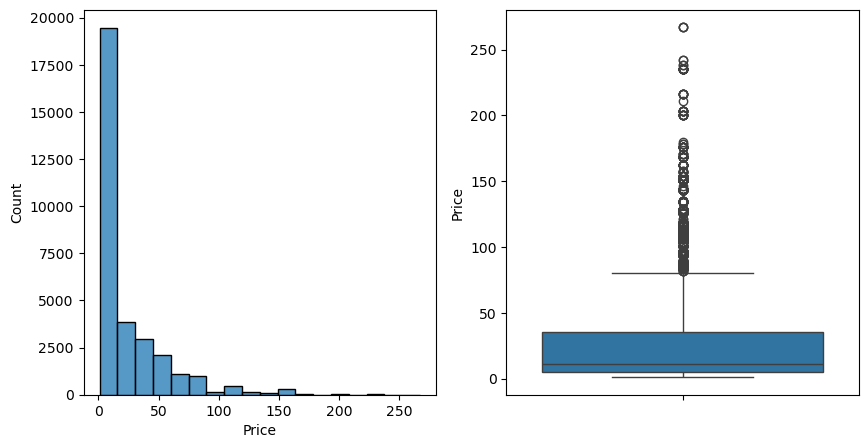

In [33]:
# we only need to concentrate on price as this is the only numerical data type
data = ticket_df['Price']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(data,binwidth=15,ax=axes[0])
sns.boxplot(data,ax=axes[1])

In [34]:
# what are the outlier values and do they happen often?
data.loc[data>150].value_counts()

Price
151    263
235     20
168     20
162     13
176     11
154     10
200      8
203      8
216      6
157      5
171      4
267      3
158      2
242      2
178      2
238      2
211      1
180      1
Name: count, dtype: int64

In [35]:
# Why are these values so expensive?
expensive_tickets = ticket_df['Price'] > 150
ticket_df.loc[expensive_tickets]

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
51,382d60f9-9fe0-4920-97e4,2024-01-01,1900-01-01 06:34:08,Station,Credit Card,None,Standard,Anytime,151,Liverpool Lime Street,London Euston,2024-01-01,1900-01-01 08:00:00,1900-01-01 10:15:00,1900-01-01 10:39:00,Delayed,Weather,No
68,9082a416-480e-4ca4-bf9d,2024-01-01,1900-01-01 15:39:11,Station,Credit Card,None,Standard,Anytime,151,Liverpool Lime Street,London Euston,2024-01-01,1900-01-01 17:00:00,1900-01-01 19:15:00,1900-01-01 19:15:00,On Time,No Delay,No
101,c57dd321-4e2f-46c0-8cfb,2024-01-02,1900-01-01 02:13:53,Station,Credit Card,None,First Class,Off-Peak,200,Manchester Piccadilly,London Euston,2024-01-02,1900-01-01 03:30:00,1900-01-01 05:20:00,1900-01-01 05:31:00,Delayed,Weather,No
148,eace2ada-5294-47e6-b4b8,2024-01-02,1900-01-01 06:33:00,Station,Credit Card,None,First Class,Anytime,235,Liverpool Lime Street,London Euston,2024-01-02,1900-01-01 08:00:00,1900-01-01 10:15:00,1900-01-01 10:15:00,Cancelled,Staff Shortage,No
149,b1c674dc-435d-4485-b654,2024-01-02,1900-01-01 06:33:10,Station,Credit Card,None,Standard,Anytime,151,Liverpool Lime Street,London Euston,2024-01-02,1900-01-01 08:00:00,1900-01-01 10:15:00,1900-01-01 10:15:00,Cancelled,Staff Shortage,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31409,5932f434-668e-46b2-84b6,2024-04-29,1900-01-01 15:19:13,Online,Contactless,None,Standard,Anytime,151,Liverpool Lime Street,London Euston,2024-04-29,1900-01-01 16:45:00,1900-01-01 19:00:00,1900-01-01 19:00:00,On Time,No Delay,No
31434,a4bbac34-6ed7-4d71-b738,2024-04-29,1900-01-01 16:49:20,Station,Contactless,None,First Class,Anytime,242,Reading,Liverpool Lime Street,2024-04-29,1900-01-01 18:15:00,1900-01-01 20:45:00,1900-01-01 20:45:00,On Time,No Delay,No
31578,cdade72b-55dd-4ff3-9f1e,2024-04-30,1900-01-01 06:41:06,Station,Credit Card,None,Standard,Anytime,151,Liverpool Lime Street,London Euston,2024-04-30,1900-01-01 08:00:00,1900-01-01 10:15:00,1900-01-01 11:04:00,Delayed,Weather,No
31607,606be109-f8e2-4267-b63f,2024-04-30,1900-01-01 12:17:40,Online,Credit Card,None,First Class,Off-Peak,203,Manchester Piccadilly,London Paddington,2024-04-30,1900-01-01 13:45:00,1900-01-01 16:00:00,1900-01-01 16:00:00,On Time,No Delay,No


In [36]:
# Were they first class?
ticket_df['Ticket Class'].loc[expensive_tickets].value_counts()

Ticket Class
Standard       297
First Class     84
Name: count, dtype: int64

In [37]:
#Were they purchased close to departure date?
date_diff = ticket_df['Date of Journey'].loc[expensive_tickets].dt.day  - ticket_df['Date of Purchase'].loc[expensive_tickets].dt.day
date_diff.value_counts()

0    381
Name: count, dtype: int64

### Observation

There is a clear trend here in that the reason for the extremely higher proce is because all the tickets in the sample were purchased on the same day. Other influencing factors will also play a part such as the destination, railcard and class of ticket.

A new feature has also been identified - Days from transaction date to departure date.

In [39]:
# Add new feature columns 
ticket_df['Datediff_from_purchase_and_departure_Date'] = (ticket_df['Date of Journey'] - ticket_df['Date of Purchase']) / np.timedelta64(1, 'D')
ticket_df['Travel_Time'] = (ticket_df['Arrival Time'] - ticket_df['Departure Time']) / np.timedelta64(1, 'm')


<Axes: xlabel='Travel_Time', ylabel='Count'>

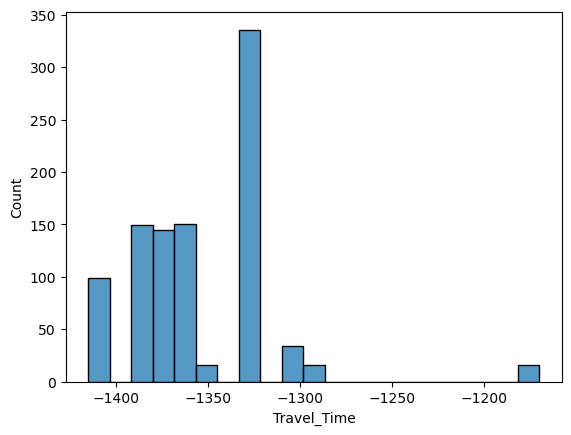

In [40]:
# Looks to be errors in the new column
sns.histplot(ticket_df['Travel_Time'].loc[ticket_df['Travel_Time']<0])

In [41]:
errors = ticket_df['Travel_Time']<0
ticket_df.loc[errors]

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Datediff_from_purchase_and_departure_Date,Travel_Time
34,a3a42b1b-bf7f-43d9-b63c,2024-01-01,1900-01-01 01:10:20,Station,Contactless,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-01,1900-01-01 23:30:00,1900-01-01 00:50:00,1900-01-01 00:50:00,On Time,No Delay,No,0.0,-1360.0
92,97c7b22b-ff75-43b0-b296,2024-01-02,1900-01-01 01:01:01,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-03,1900-01-01 23:30:00,1900-01-01 00:00:00,1900-01-01 00:00:00,On Time,No Delay,No,1.0,-1410.0
94,935dd774-378e-49a1-87cf,2024-01-02,1900-01-01 01:17:27,Online,Contactless,Disabled,Standard,Advance,23,London Kings Cross,York,2024-01-03,1900-01-01 23:45:00,1900-01-01 01:35:00,1900-01-01 01:35:00,On Time,No Delay,No,1.0,-1330.0
95,f3a6143f-0d4e-40df-83b0,2024-01-02,1900-01-01 01:19:18,Online,Contactless,Disabled,Standard,Advance,5,York,Durham,2024-01-03,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,1.0,-1390.0
97,5579a244-2516-4511-8b57,2024-01-02,1900-01-01 01:26:15,Online,Contactless,Disabled,Standard,Advance,5,York,Durham,2024-01-03,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,1.0,-1390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31263,820301aa-10e9-45e7-872e,2024-04-29,1900-01-01 01:19:27,Online,Contactless,Disabled,Standard,Advance,5,York,Durham,2024-04-30,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,1.0,-1390.0
31264,ae473066-73af-4c9a-8d81,2024-04-29,1900-01-01 01:26:31,Online,Contactless,Disabled,Standard,Off-Peak,8,York,Durham,2024-04-29,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,0.0,-1390.0
31512,d2106ee0-7d27-4ad0-91b4,2024-04-29,1900-01-01 21:54:12,Online,Contactless,None,Standard,Advance,36,Birmingham New Street,Edinburgh,2024-04-30,1900-01-01 20:15:00,1900-01-01 00:45:00,1900-01-01 00:45:00,On Time,No Delay,No,1.0,-1170.0
31536,97658b57-8728-47ec-9b1d,2024-04-30,1900-01-01 01:11:41,Station,Credit Card,None,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-04-30,1900-01-01 23:30:00,1900-01-01 00:50:00,1900-01-01 00:50:00,On Time,No Delay,No,0.0,-1360.0


In [42]:
# Based on the above, I need to add 1 day (24*60) to the new column to give the correct minutes
# as the date difference isn't allowing for times the following day
ticket_df['Travel_Time'] = (ticket_df.apply(lambda row: 
                                                    row['Travel_Time'] + 24*60
                                                    if row['Travel_Time']<0 
                                                    else row['Travel_Time'],
                                           axis=1)
                            )

In [43]:
a = ticket_df['Arrival Time']<ticket_df['Departure Time']
ticket_df.loc[a]

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Datediff_from_purchase_and_departure_Date,Travel_Time
34,a3a42b1b-bf7f-43d9-b63c,2024-01-01,1900-01-01 01:10:20,Station,Contactless,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-01,1900-01-01 23:30:00,1900-01-01 00:50:00,1900-01-01 00:50:00,On Time,No Delay,No,0.0,80.0
92,97c7b22b-ff75-43b0-b296,2024-01-02,1900-01-01 01:01:01,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-03,1900-01-01 23:30:00,1900-01-01 00:00:00,1900-01-01 00:00:00,On Time,No Delay,No,1.0,30.0
94,935dd774-378e-49a1-87cf,2024-01-02,1900-01-01 01:17:27,Online,Contactless,Disabled,Standard,Advance,23,London Kings Cross,York,2024-01-03,1900-01-01 23:45:00,1900-01-01 01:35:00,1900-01-01 01:35:00,On Time,No Delay,No,1.0,110.0
95,f3a6143f-0d4e-40df-83b0,2024-01-02,1900-01-01 01:19:18,Online,Contactless,Disabled,Standard,Advance,5,York,Durham,2024-01-03,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,1.0,50.0
97,5579a244-2516-4511-8b57,2024-01-02,1900-01-01 01:26:15,Online,Contactless,Disabled,Standard,Advance,5,York,Durham,2024-01-03,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31263,820301aa-10e9-45e7-872e,2024-04-29,1900-01-01 01:19:27,Online,Contactless,Disabled,Standard,Advance,5,York,Durham,2024-04-30,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,1.0,50.0
31264,ae473066-73af-4c9a-8d81,2024-04-29,1900-01-01 01:26:31,Online,Contactless,Disabled,Standard,Off-Peak,8,York,Durham,2024-04-29,1900-01-01 23:45:00,1900-01-01 00:35:00,1900-01-01 00:35:00,On Time,No Delay,No,0.0,50.0
31512,d2106ee0-7d27-4ad0-91b4,2024-04-29,1900-01-01 21:54:12,Online,Contactless,None,Standard,Advance,36,Birmingham New Street,Edinburgh,2024-04-30,1900-01-01 20:15:00,1900-01-01 00:45:00,1900-01-01 00:45:00,On Time,No Delay,No,1.0,270.0
31536,97658b57-8728-47ec-9b1d,2024-04-30,1900-01-01 01:11:41,Station,Credit Card,None,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-04-30,1900-01-01 23:30:00,1900-01-01 00:50:00,1900-01-01 00:50:00,On Time,No Delay,No,0.0,80.0


<Axes: xlabel='Price', ylabel='Count'>

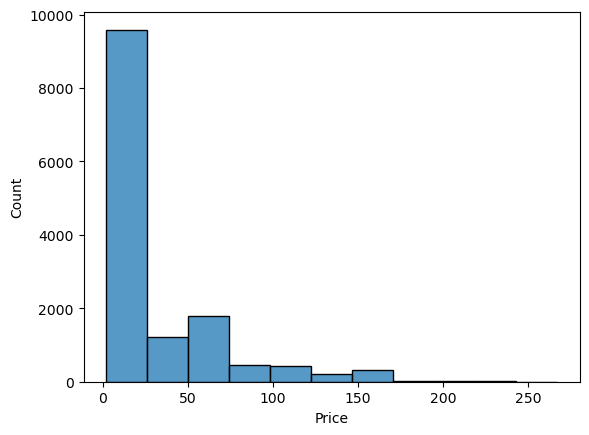

In [44]:
data_filter = (ticket_df['Datediff_from_purchase_and_departure_Date']==0)
date_data = ticket_df['Price'].loc[data_filter]
sns.histplot(date_data,binwidth=25)

### Observation

The above confirms that there are other features that impact the price other than the date difference between purchase date and departure date.

The dataset is now ready for EDA.

## EDA



In [47]:
# Split the data
y = ticket_df['Price']
x = ticket_df.loc[:, ticket_df.columns != 'Price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a new dataframe to explore the training data.
xy_train_df = pd.concat([X_train,y_train], axis=1)

In [48]:
xy_train_df

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Datediff_from_purchase_and_departure_Date,Travel_Time,Price
25483,bba5ba32-edbb-4916-a93e,2024-04-07,1900-01-01 19:25:52,Online,Credit Card,Senior,Standard,Advance,Manchester Piccadilly,Liverpool Lime Street,2024-04-08,1900-01-01 18:45:00,1900-01-01 19:15:00,1900-01-01 19:15:00,On Time,No Delay,No,1.0,30.0,2
30601,4e81470f-9581-40a4-a667,2024-04-26,1900-01-01 15:06:42,Station,Contactless,None,Standard,Advance,Reading,London Paddington,2024-04-27,1900-01-01 13:30:00,1900-01-01 13:55:00,1900-01-01 13:55:00,On Time,No Delay,No,1.0,25.0,13
26948,d84809d4-e6fc-4b2b-a7fa,2024-04-13,1900-01-01 05:03:49,Station,Credit Card,None,Standard,Advance,Manchester Piccadilly,Liverpool Lime Street,2024-04-14,1900-01-01 03:30:00,1900-01-01 04:00:00,1900-01-01 04:10:00,Delayed,Weather,No,1.0,30.0,3
19872,649604b4-ba8c-4838-a61b,2024-03-16,1900-01-01 17:20:29,Station,Credit Card,Adult,Standard,Off-Peak,London Euston,Manchester Piccadilly,2024-03-16,1900-01-01 18:45:00,1900-01-01 20:35:00,1900-01-01 20:35:00,On Time,No Delay,No,0.0,110.0,71
10462,2501fb43-9ddd-415a-a32b,2024-02-05,1900-01-01 17:24:45,Online,Credit Card,Adult,Standard,Advance,London St Pancras,Birmingham New Street,2024-02-28,1900-01-01 15:45:00,1900-01-01 17:05:00,1900-01-01 17:05:00,On Time,No Delay,No,23.0,80.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,c81b0b92-c75f-447b-97bf,2024-04-23,1900-01-01 15:39:08,Online,Credit Card,None,Standard,Anytime,London Euston,Birmingham New Street,2024-04-23,1900-01-01 17:00:00,1900-01-01 18:20:00,1900-01-01 18:20:00,On Time,No Delay,No,0.0,80.0,13
5390,7748bafe-53eb-4065-bf2d,2024-01-21,1900-01-01 07:49:36,Online,Credit Card,None,Standard,Advance,London Kings Cross,York,2024-01-22,1900-01-01 06:15:00,1900-01-01 08:05:00,1900-01-01 08:05:00,On Time,No Delay,No,1.0,110.0,35
860,9e55ea2f-2e4e-4d89-9010,2024-01-04,1900-01-01 18:19:19,Online,Contactless,None,Standard,Advance,Manchester Piccadilly,Liverpool Lime Street,2024-01-05,1900-01-01 16:45:00,1900-01-01 17:15:00,1900-01-01 17:15:00,On Time,No Delay,No,1.0,30.0,3
15795,8b653a2f-a776-451a-9649,2024-02-29,1900-01-01 17:49:53,Online,Contactless,Adult,Standard,Advance,Manchester Piccadilly,Liverpool Lime Street,2024-03-01,1900-01-01 16:15:00,1900-01-01 16:45:00,1900-01-01 16:45:00,On Time,No Delay,No,1.0,30.0,2


### What features influences the price of a ticket?

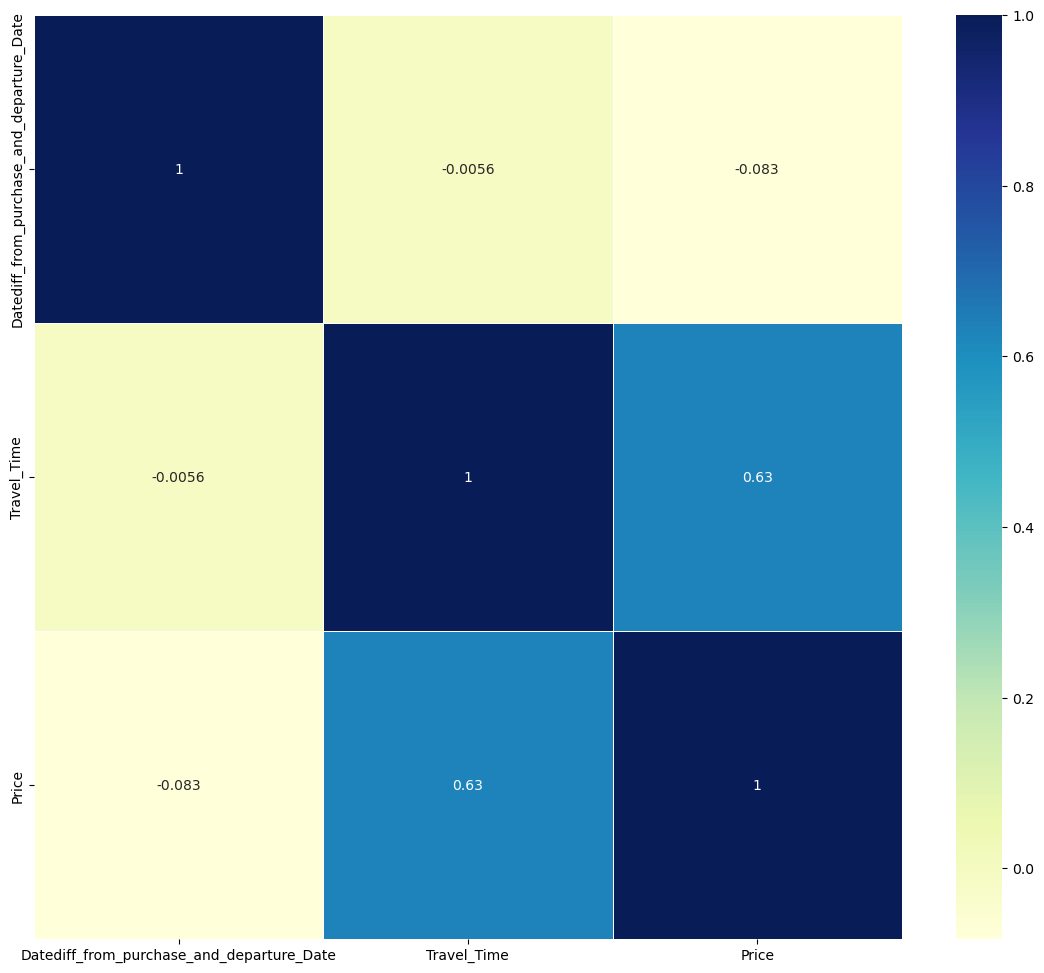

In [50]:
# view correlation coeeficients from each column
# Omit any variables that we won't  use 
correlation_matrix = xy_train_df.select_dtypes("number").corr()
plt.rcParams["figure.figsize"] = (14,12)
sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu",linewidths=0.5)
plt.show()


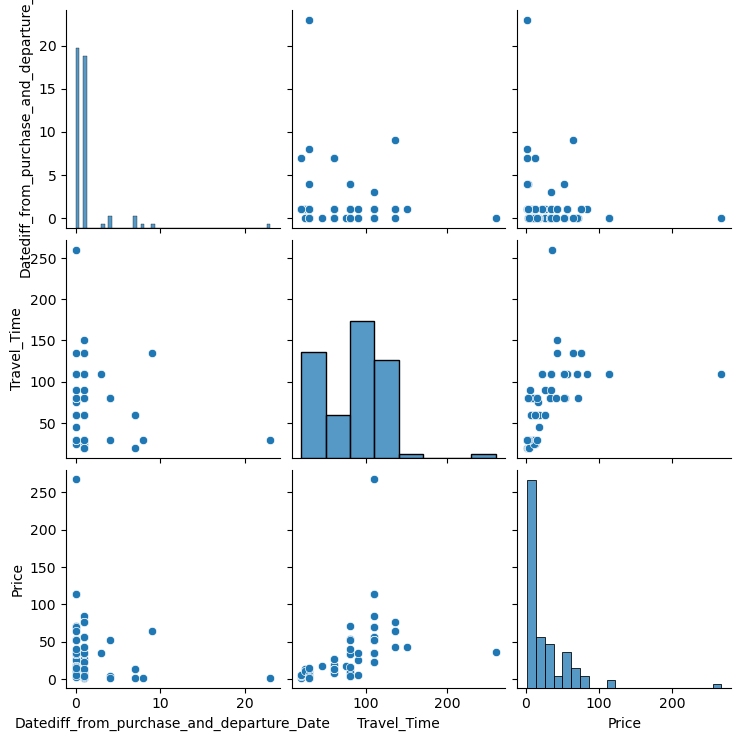

In [51]:
sns.pairplot(xy_train_df.sample(n=100));

### Observation
There is a relatively strong, positive relationship between Price & Travel Time suggesting longer distanced ride cost more. We haven't considered the type of ticket, class, Rail Card and location as all these features may influence price. Furthermore, there may be too much noise in the data that is distorting the relationship between ticket price and datedff features, which means a new feature may need to be created to extract as much value to improve ML performance.

There is no evidence to suggest there is a relationship between price and when you purchase that ticket.

The optimal way to do this is explore the data within the datediff dataset and identify which features could be creating too much noise such as location, ticket, class, Rail Card etc.

In [53]:
#Describe the ticket prices for First class and standard
(xy_train_df.groupby('Ticket Class').agg(Median_Price=('Price','median'),
                                        Mean_Price = ('Price','mean'),
                                        Count_Transactions=('Price','count'),
                                        Min_Price=('Price','min'),
                                        Max_Price=('Price','max'),
                                        stdev_price=('Price','std')))

,Median_Price,Mean_Price,Count_Transactions,Min_Price,Max_Price,stdev_price
Ticket Class,,,,,,
First Class,41.0,50.027315,2160,4,267,42.367727
Standard,10.0,20.766815,19997,1,171,27.124941


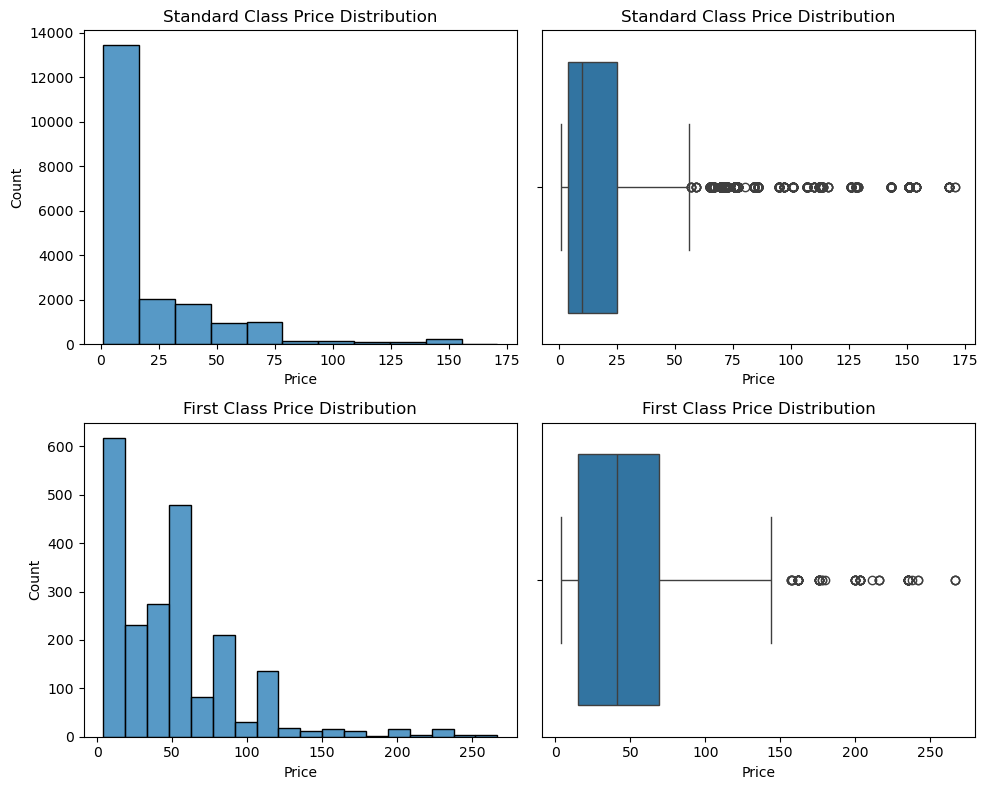

In [54]:
# Visualise distributions of price for both class types
Standard_price = xy_train_df['Price'].loc[xy_train_df['Ticket Class']=='Standard']
First_class_price = xy_train_df['Price'].loc[xy_train_df['Ticket Class']!='Standard']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

#set the visuals and their titles
sns.histplot(Standard_price,binwidth=15,ax=axes[0,0])
axes[0,0].set_title('Standard Class Price Distribution')
sns.boxplot(x=Standard_price,ax=axes[0,1])
axes[0,1].set_title('Standard Class Price Distribution')
sns.histplot(First_class_price,binwidth=15,ax=axes[1,0])
axes[1,0].set_title('First Class Price Distribution')
sns.boxplot(x=First_class_price,ax=axes[1,1])
axes[1,1].set_title('First Class Price Distribution')

plt.tight_layout()
plt.show()

In [55]:
# Hypothesis test to test whether ticket prices for First Class tickets are greater than Standard
# H0: First Class Ticket Prices = Standard Ticket Prices
# H1: First Class Ticket Prices <> Standard Ticket Prices

def one_tailed_hypothesis(sample_a,sample_b):
    #bootstrap sampling
    bootstrap_sample_a=[]
    bootstrap_sample_b=[]
    #create the mean smaple
    for i in range(1000):
        sample_a_ = np.random.choice(sample_a, size=len(data),replace=True)
        sample_b_ = np.random.choice(sample_b, size=len(data),replace=True)
        bootstrap_sample_a.append(np.mean(sample_a_))
        bootstrap_sample_b.append(np.mean(sample_b_))
    

    # get sample sizes
    n1 = len(bootstrap_sample_a)
    n2 = len(bootstrap_sample_b)
    
    # get the standard deviations
    std1 = np.std(bootstrap_sample_a)
    std2 = np.std(bootstrap_sample_b)
    
    #calculate the z-scritical value and look up using cdf.
    denominator = np.sqrt((std1**2/n1) + (std2**2/n2))
    mean_diff = sample_a.mean()-sample_b.mean()
    z_critical = mean_diff/denominator
    p = st.norm.cdf(z_critical)
    
    if p < 0.05:
        output = print(f'Reject the Null hypothesis as p equals {p}')
    else:
        output = print(f'Unable to reject the Null Hypothesis as p equals {p}')
    return output
    

In [56]:
# Run the test
one_tailed_hypothesis(Standard_price,First_class_price)



Reject the Null hypothesis as p equals 0.0


### Observation

The analysis above shows that First class tickets do hold a higher price and the spread of the data is a lot larger than that of standard class. The next question is answer is what impact does both when you buy your ticket and the class you purchase have on the price?

In [58]:
# extract datasets for different Railcard types
# RC = Railcard
No_RC_Filter = xy_train_df['Railcard']=='None'
Adult_RC_Filter = xy_train_df['Railcard']=='Adult'
Disabled_RC_Filter = xy_train_df['Railcard']== 'Disabled'
Snr_RC_Filter = xy_train_df['Railcard']== 'Senior'

No_RC = xy_train_df['Price'].loc[No_RC_Filter]
Adult_RC = xy_train_df['Price'].loc[Adult_RC_Filter]
Disabled_RC = xy_train_df['Price'].loc[Disabled_RC_Filter]
Snr_RC = xy_train_df['Price'].loc[Snr_RC_Filter]


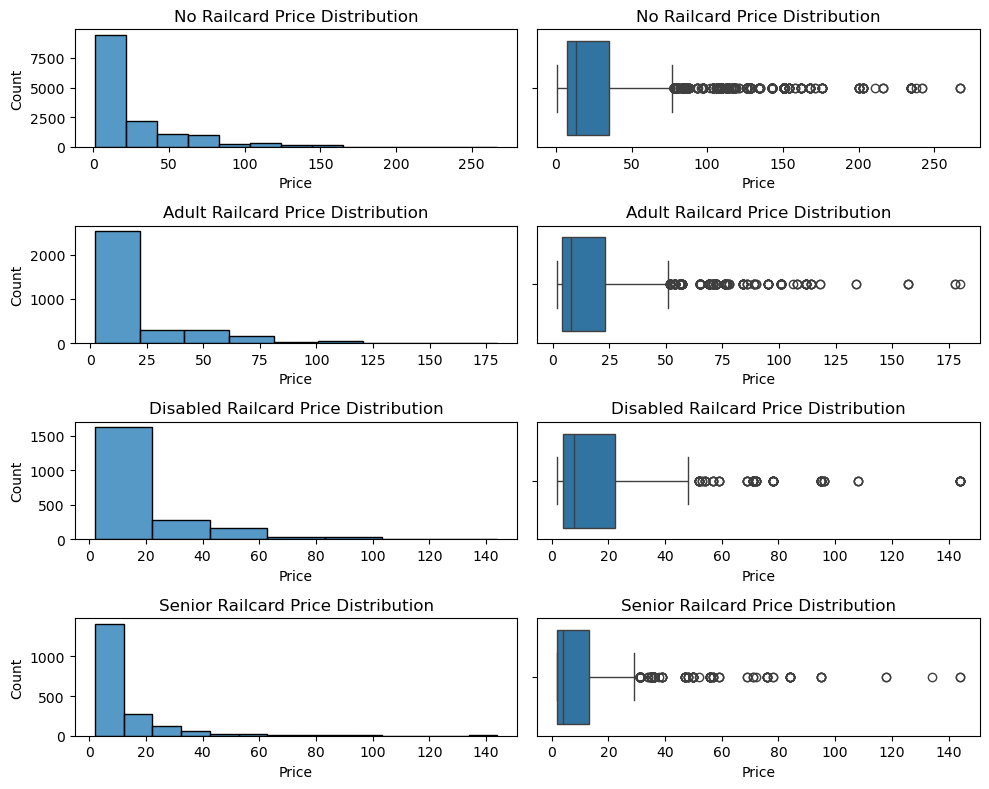

In [59]:
# Compare the distributions by Visualising distributions of price for both class types
Standard_price = xy_train_df['Price'].loc[xy_train_df['Ticket Class']=='Standard']
First_class_price = xy_train_df['Price'].loc[xy_train_df['Ticket Class']!='Standard']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

#set the visuals and their titles
sns.histplot(No_RC,binwidth=20,ax=axes[0,0])
axes[0,0].set_title('No Railcard Price Distribution')
sns.boxplot(x=No_RC,ax=axes[0,1])
axes[0,1].set_title('No Railcard Price Distribution')

sns.histplot(Adult_RC,binwidth=20,ax=axes[1,0])
axes[1,0].set_title('Adult Railcard Price Distribution')
sns.boxplot(x=Adult_RC,ax=axes[1,1])
axes[1,1].set_title('Adult Railcard Price Distribution')

sns.histplot(Disabled_RC,binwidth=20,ax=axes[2,0])
axes[2,0].set_title('Disabled Railcard Price Distribution')
sns.boxplot(x=Disabled_RC,ax=axes[2,1])
axes[2,1].set_title('Disabled Railcard Price Distribution')


sns.histplot(Snr_RC,binwidth=10,ax=axes[3,0])
axes[3,0].set_title('Senior Railcard Price Distribution')
sns.boxplot(x=Snr_RC,ax=axes[3,1])
axes[3,1].set_title('Senior Railcard Price Distribution')

plt.tight_layout()
plt.show()

### Observation
The above shows that most of the price fall between £1 - £20/£25, meaning if someone was to buy a ticket regardles of whether they own Railcard or not, where they're going etc, there is a strong chance that the price range will be the price the person will pay.

It appears that having a Railcard does provide some benefits to the user in that, based off the above, it gives typically gives the user a cheaper price.

Therefore, Having a Railcard does impact the price, but this needs to be confirmed via ANOVA. However, it must be noted for ethical reasons that this feature must be changed to prevent any potential ethical concerns within the Model as using this feature could lead to discriminatory results. The feature will be Owns Railcard Yes or No.

In [61]:
xy_train_df['Has_Railcard'] = xy_train_df.apply(lambda row: 'Yes' if row['Railcard'] != 'None' else "No", axis=1)
X_test['Has_Railcard'] = X_test.apply(lambda row: 'Yes' if row['Railcard'] != 'None' else "No", axis=1)

In [62]:
xy_train_df.groupby(['Has_Railcard','Ticket Class']).agg(mean_price=('Price','mean'),
                                                        median_price=('Price','median'),
                                                         variation_price = ('Price','std'),
                                                        max_price = ('Price','max'),
                                                        min_price = ('Price','min'),
                                                         Sample_size=('Price','count')
                                                        )

mean_price  median_price  variation_price  \
Has_Railcard Ticket Class                                              
No           First Class    57.914833          54.0        45.395577   
             Standard       24.408226          13.0        29.985838   
Yes          First Class    35.229028          35.0        31.022371   
             Standard       13.615681           7.0        18.379077   

                           max_price  min_price  Sample_size  
Has_Railcard Ticket Class                                     
No           First Class         267          4         1409  
             Standard            171          1        13250  
Yes          First Class         180          5          751  
             Standard            114          2         6747

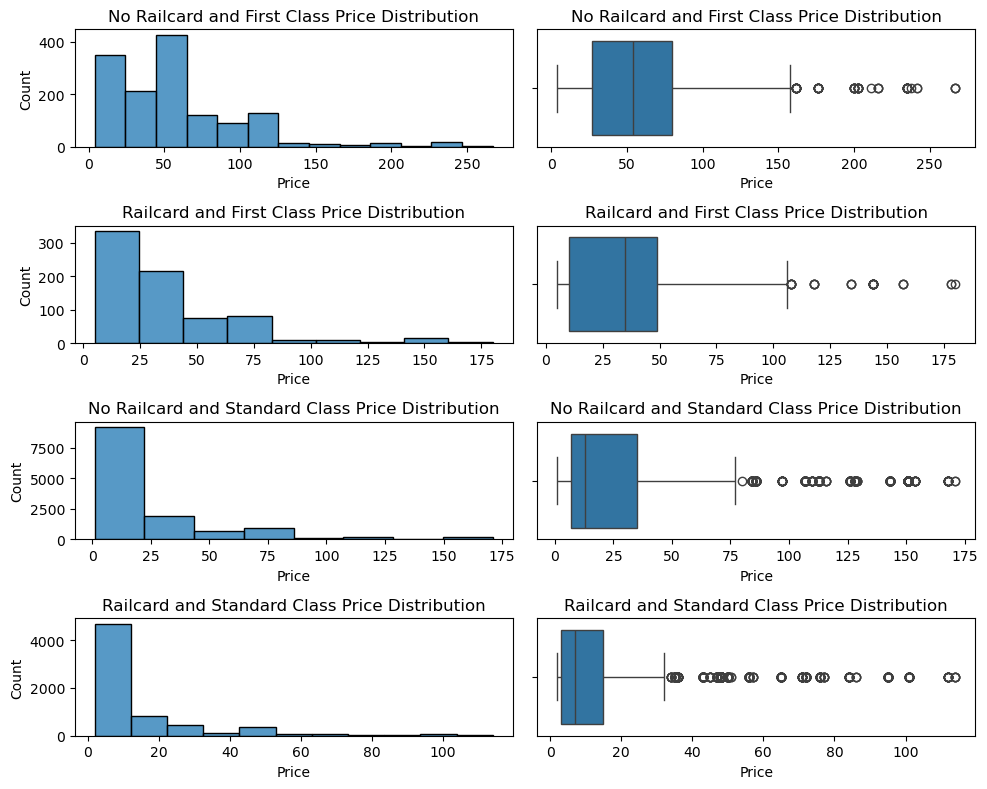

In [63]:
# Compare the distributions by Visualising distributions of price for both class types

no_rc_fc_filter = (xy_train_df['Has_Railcard']=='No')&(xy_train_df['Ticket Class']=='First Class')
rc_fc_filter = (xy_train_df['Has_Railcard']=='Yes')&(xy_train_df['Ticket Class']=='First Class')
no_rc_std_filter = (xy_train_df['Has_Railcard']=='No')&(xy_train_df['Ticket Class']!='First Class')
rc_std_filter = (xy_train_df['Has_Railcard']=='Yes')&(xy_train_df['Ticket Class']!='First Class')

no_rc_fc = xy_train_df['Price'].loc[no_rc_fc_filter]
rc_fc = xy_train_df['Price'].loc[rc_fc_filter]
no_rc_std = xy_train_df['Price'].loc[no_rc_std_filter]
rc_std = xy_train_df['Price'].loc[rc_std_filter]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

#set the visuals and their titles
sns.histplot(no_rc_fc,binwidth=20,ax=axes[0,0])
axes[0,0].set_title('No Railcard and First Class Price Distribution')
sns.boxplot(x=no_rc_fc,ax=axes[0,1])
axes[0,1].set_title('No Railcard and First Class Price Distribution')

sns.histplot(rc_fc,binwidth=20,ax=axes[1,0])
axes[1,0].set_title('Railcard and First Class Price Distribution')
sns.boxplot(x=rc_fc,ax=axes[1,1])
axes[1,1].set_title('Railcard and First Class Price Distribution')

sns.histplot(no_rc_std,binwidth=20,ax=axes[2,0])
axes[2,0].set_title('No Railcard and Standard Class Price Distribution')
sns.boxplot(x=no_rc_std,ax=axes[2,1])
axes[2,1].set_title('No Railcard and Standard Class Price Distribution')


sns.histplot(rc_std,binwidth=10,ax=axes[3,0])
axes[3,0].set_title('Railcard and Standard Class Price Distribution')
sns.boxplot(x=rc_std,ax=axes[3,1])
axes[3,1].set_title('Railcard and Standard Class Price Distribution')

plt.tight_layout()
plt.show()


In [64]:
one_tailed_hypothesis(rc_fc,no_rc_fc)

Reject the Null hypothesis as p equals 0.0


In [65]:
one_tailed_hypothesis(rc_std,no_rc_std)

Reject the Null hypothesis as p equals 0.0


### Observation
The above confirms that the when buying a ticket, having a railcard does impact the price you'll pay regardless of ticket class.

In [67]:
# Review Ticket type's impact of price
xy_train_df.groupby('Ticket Type').agg(mean_price=('Price','mean'),
                                                        median_price=('Price','median'),
                                                        variation_price = ('Price','std'),
                                                        max_price = ('Price','max'),
                                                        min_price = ('Price','min'),
                                                         Sample_size=('Price','count')
                                                        ).sort_values(by='median_price',ascending=True)

,mean_price,median_price,variation_price,max_price,min_price,Sample_size
Ticket Type,,,,,,
Advance,17.562160,8.0,20.859249,135,1,12331
Off-Peak,26.182933,12.0,31.358635,203,2,6117
Anytime,39.528984,17.0,44.812483,267,2,3709


### Observation

Advance ticket look's to be the cheapest option when buying a train ticket, followed by Off-Peak then Anytime suggesting an impact of the price a customer will pay.

In [69]:
# Review Ticket type's impact of price with has rail card and ticket class
(xy_train_df.loc[xy_train_df['Ticket Class']=='Standard'].groupby(['Has_Railcard','Ticket Type'])
                                                          .agg(mean_price=('Price','mean'),
                                                               median_price=('Price','median'),
                                                               variation_price = ('Price','std'),
                                                               max_price = ('Price','max'),
                                                               min_price = ('Price','min'),
                                                               Sample_size=('Price','count')
                                                        ).sort_values(by='median_price',ascending=True)
                                                         .reset_index()
)

,Has_Railcard,Ticket Type,mean_price,median_price,variation_price,max_price,min_price,Sample_size
0,Yes,Advance,10.185245,4.0,13.267735,57,2,3741
1,Yes,Off-Peak,14.899718,7.0,19.579459,86,2,1775
2,No,Advance,18.040869,8.0,20.328443,86,1,7365
3,Yes,Anytime,22.189277,11.0,25.548661,114,3,1231
4,No,Off-Peak,26.381736,12.0,29.927710,128,3,3767
5,No,Anytime,43.039660,25.0,45.838252,171,2,2118


In [70]:
# Review Ticket type's impact of price with has rail card and ticket class
(xy_train_df.loc[xy_train_df['Ticket Class']=='First Class'].groupby(['Has_Railcard','Ticket Type'])
                                                          .agg(mean_price=('Price','mean'),
                                                               median_price=('Price','median'),
                                                               variation_price = ('Price','std'),
                                                               max_price = ('Price','max'),
                                                               min_price = ('Price','min'),
                                                               Sample_size=('Price','count')
                                                        ).sort_values(by='median_price',ascending=True)
                                                         .reset_index()
)

,Has_Railcard,Ticket Type,mean_price,median_price,variation_price,max_price,min_price,Sample_size
0,Yes,Advance,25.058824,19.0,18.995075,90,5,442
1,Yes,Off-Peak,41.186335,49.0,30.205795,134,8,161
2,No,Advance,44.072797,52.0,30.424340,135,4,783
3,Yes,Anytime,59.121622,69.0,43.703688,180,11,148
4,No,Off-Peak,66.915459,78.0,45.787805,203,6,414
5,No,Anytime,91.462264,104.0,64.934480,267,8,212


### Observation

For both First Class and standard tickets, the customer is better off buying an advance ticket than an Anytime ticket regardless of whther that individual has a Railcard as, on average, the prices of Advance tickets are cheaper.

# Modeling
In this section, the datasets will be prepped for modeling and inputted into a Multiple-Linear Regression to predict the prices of train tickets based off the selected features - Ticket Type, Ticket Class, Travel Time and Railcard.

In [73]:
# convert categorical data points into numeric for the model
railcard_le = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ticket_type_le =  OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ticket_class_le = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')



#Create new df for the features
X_train_input = xy_train_df[['Ticket Type','Ticket Class','Has_Railcard','Travel_Time']]

# Create dummy variables
rail_card = railcard_le.fit_transform(X_train_input[['Has_Railcard']])
ticket_type = ticket_type_le.fit_transform(X_train_input[['Ticket Type']])
ticket_class = ticket_class_le.fit_transform(X_train_input[['Ticket Class']])

# Createe new df
X_train_input = pd.concat([X_train_input[['Travel_Time']],rail_card,ticket_type,ticket_class],axis=1)

y_train = xy_train_df['Price']

In [74]:
# Do the same for x_test
test_rail_card = railcard_le.transform(X_test[['Has_Railcard']])
test_ticket_type = ticket_type_le.transform(X_test[['Ticket Type']])
test_ticket_class = ticket_class_le.transform(X_test[['Ticket Class']])

#create new test df
X_test = pd.concat([X_test[['Travel_Time']],test_rail_card,test_ticket_type,test_ticket_class],axis=1)

In [75]:
rail_card


,Has_Railcard_No,Has_Railcard_Yes
25483,0.0,1.0
30601,1.0,0.0
26948,1.0,0.0
19872,0.0,1.0
10462,0.0,1.0
...,...,...
29802,1.0,0.0
5390,1.0,0.0
860,1.0,0.0
15795,0.0,1.0


In [76]:
# Normalise prices & travel time

y_train = np.log(y_train)
X_train_input['Travel_Time'] = np.log(X_train_input['Travel_Time'])

# Do same for test

y_test = np.log(y_test)
X_test['Travel_Time'] = np.log(X_test['Travel_Time'])

In [77]:
corr_df = X_train_input.corr()

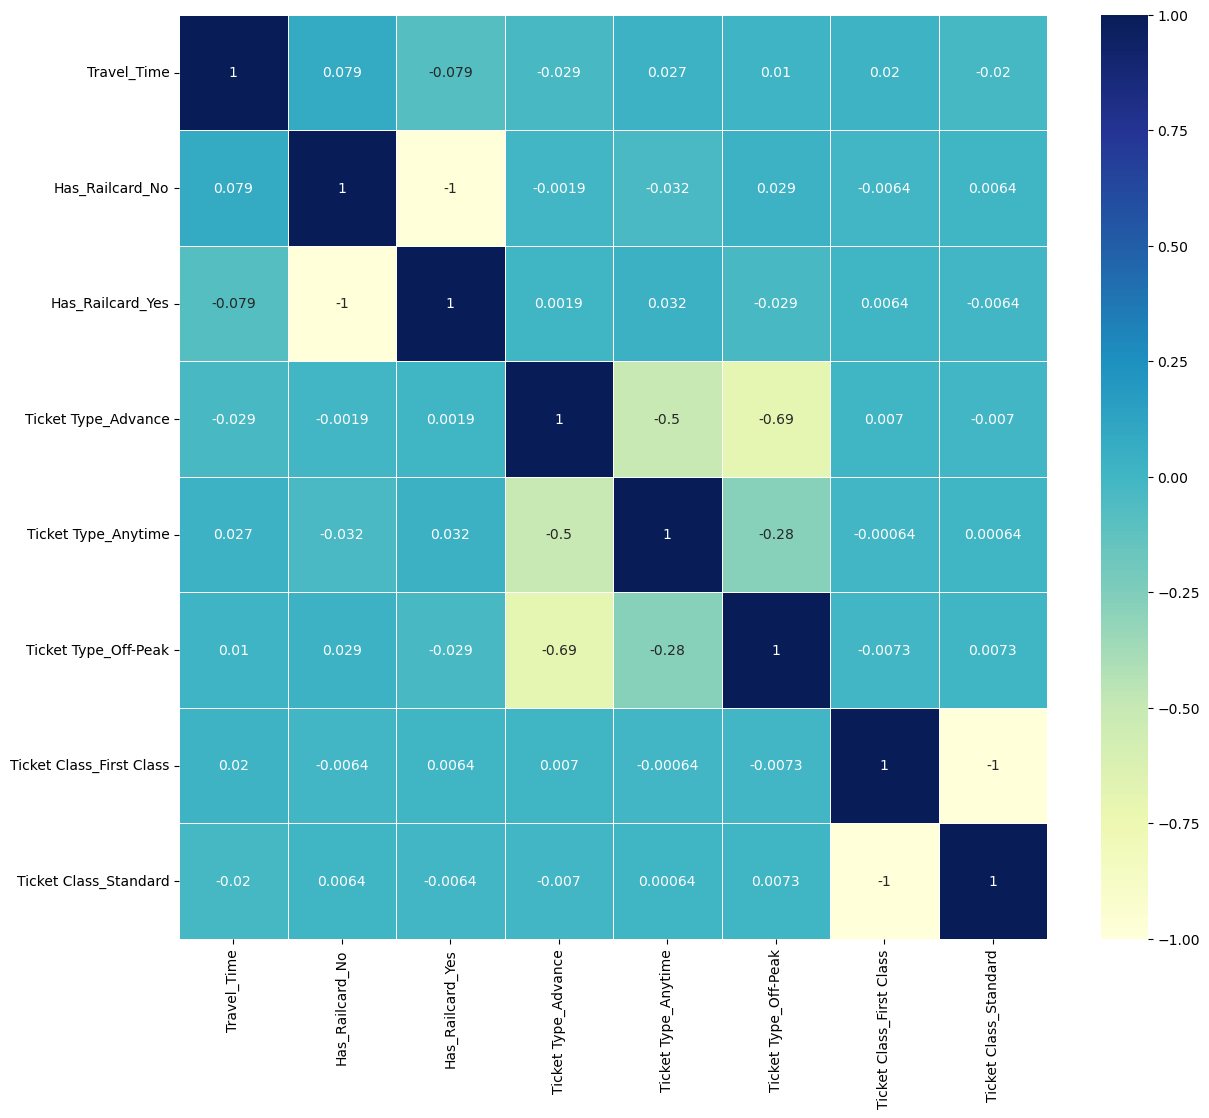

In [78]:
sns.heatmap(corr_df, annot=True,cmap="YlGnBu",linewidths=0.5);

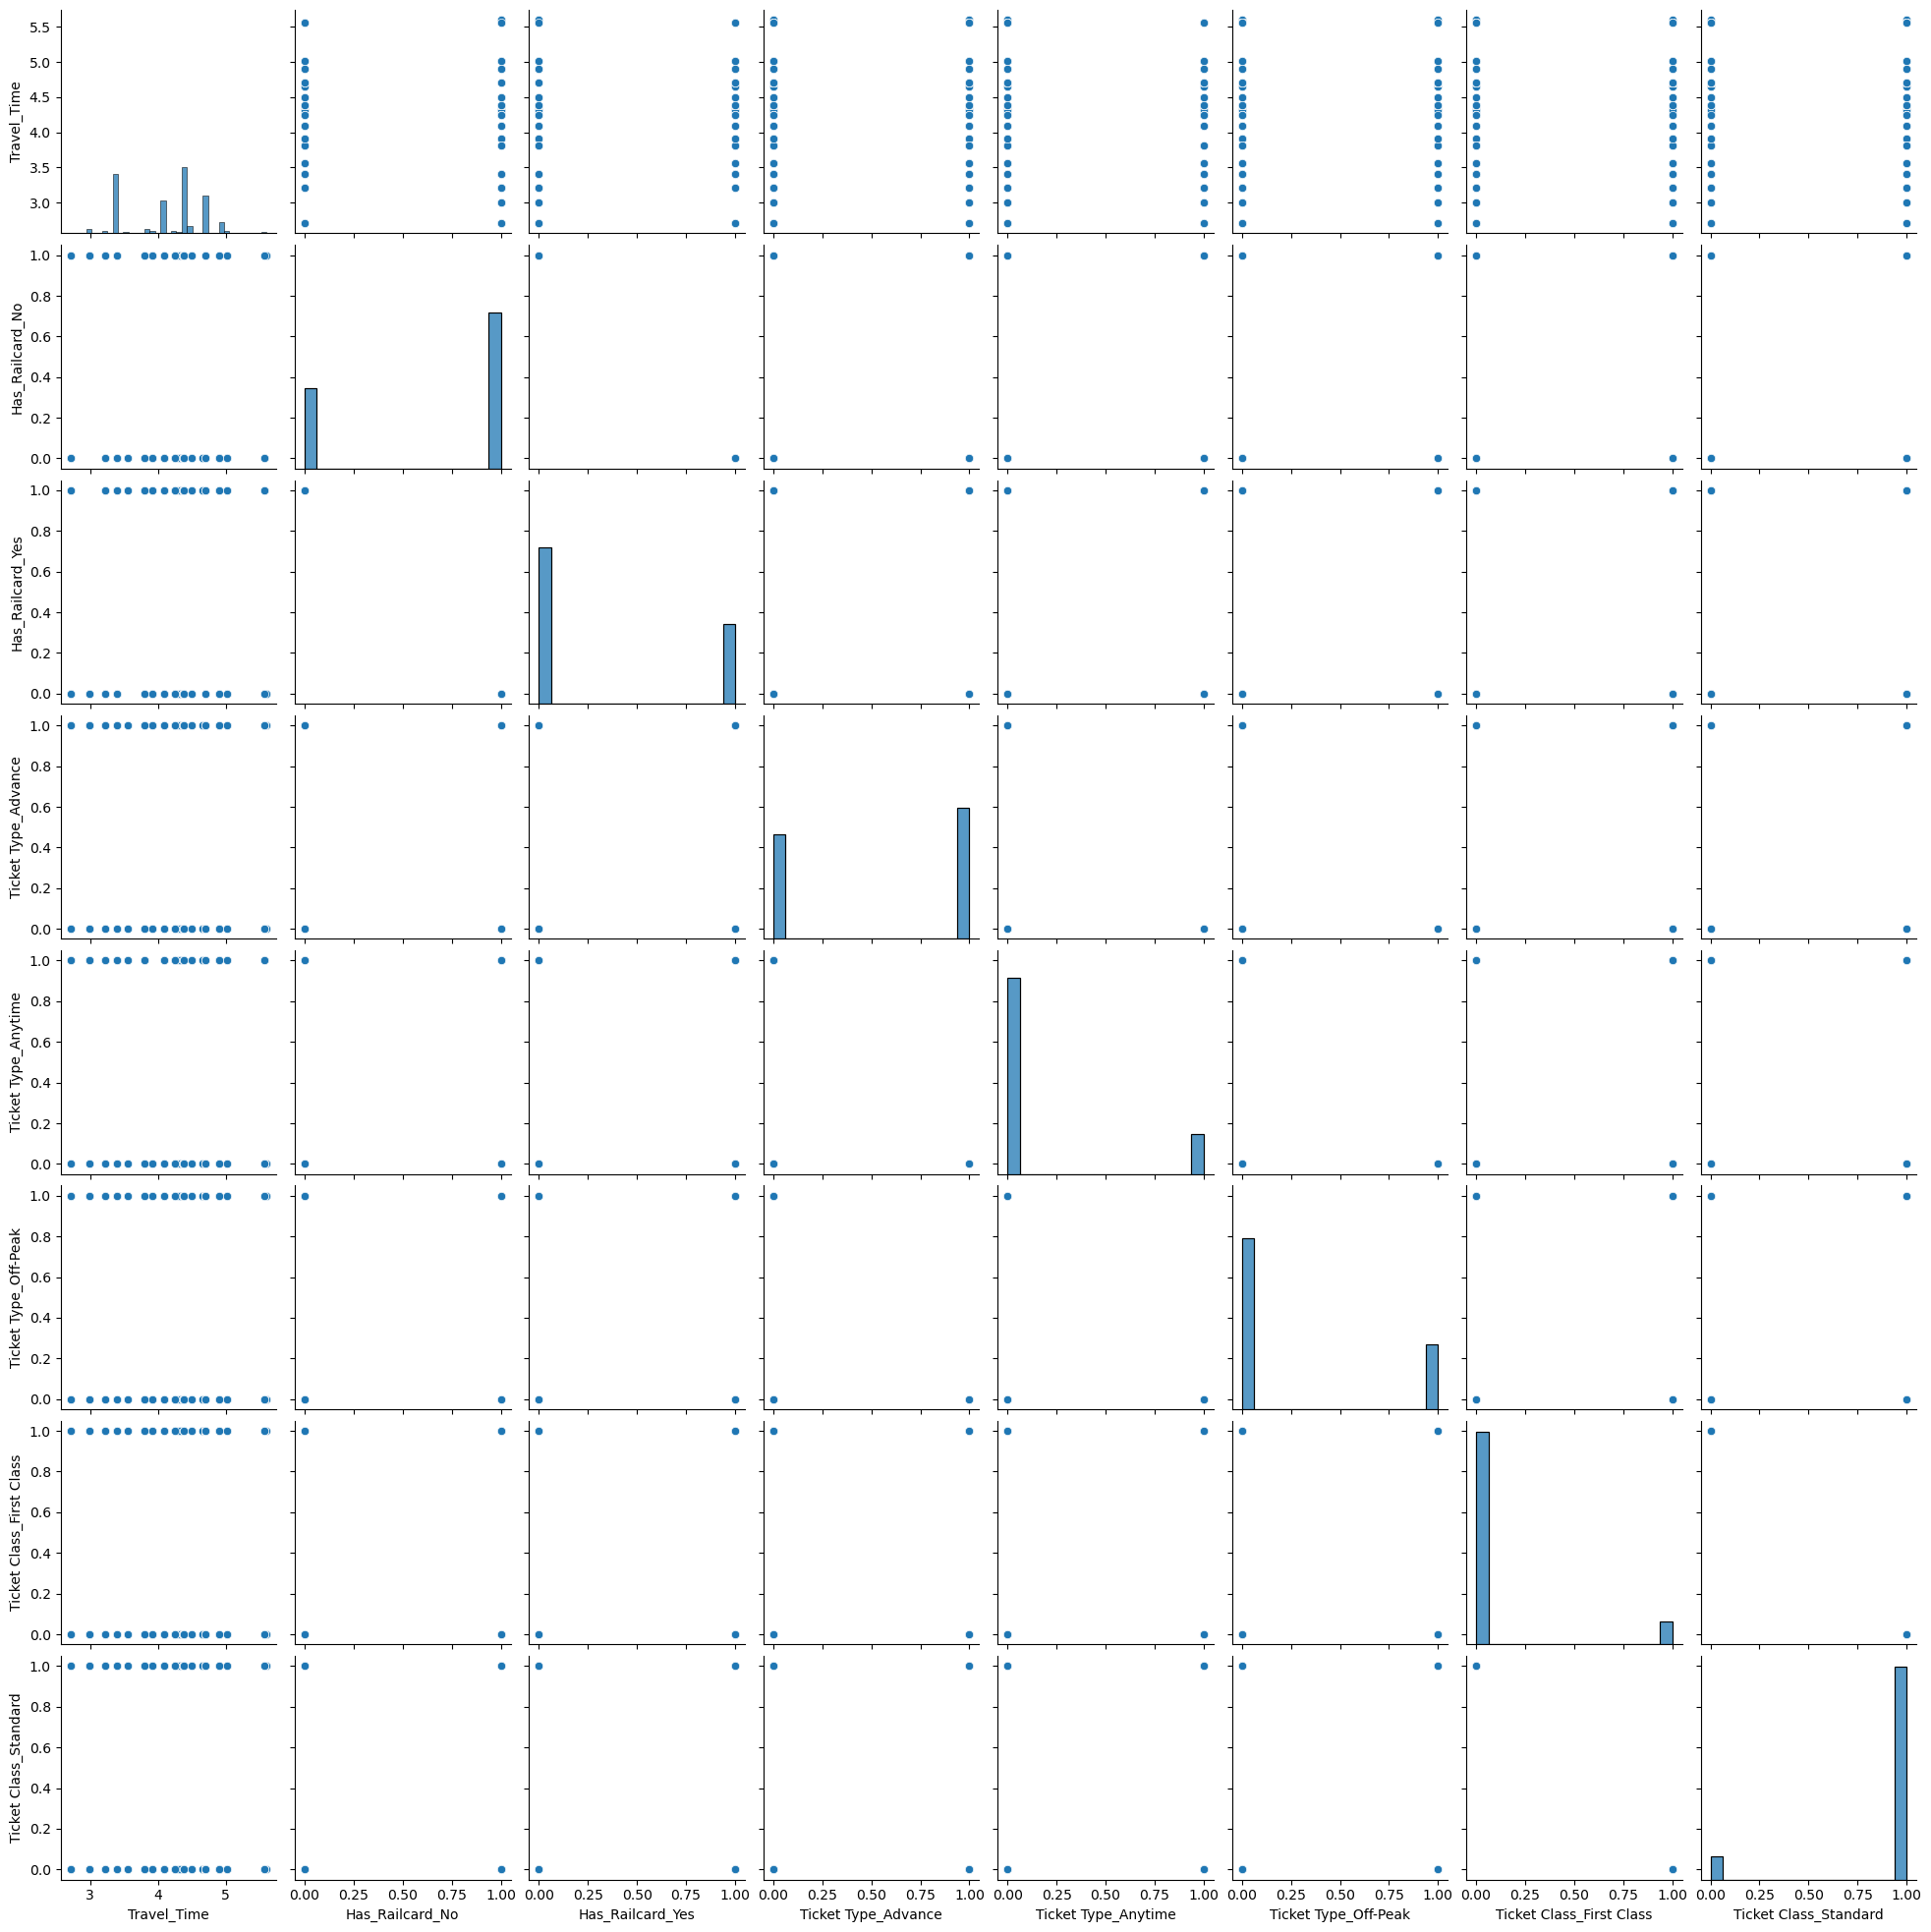

In [79]:
sns.pairplot(X_train_input);

In [80]:
# train the model
linreg = LinearRegression(fit_intercept=True)
#linreg.fit(X_train_input,y_train)

In [81]:
linreg.fit(X_train_input,y_train)

LinearRegression()

In [82]:
# calculate an accuracy metric and an error metric
train_set_rsq = linreg.score(X_train_input,y_train)
print(f'The R^2 value is: {train_set_rsq}')



The R^2 value is: 0.7560811422867764


### Observation
The Model appears to be doing well due to it's R^2 value, but it shouldn't be the only thing to rely on in terms of analysing the performance. I'll turn to RMSE (Root Meas Square Error) and the Standard Deviation of the actual target value and compare the two. Ideally, the RMSE should be as little as possible and smaller than the Standard Deviation of the actual target.

In [84]:
X_test

,Travel_Time,Has_Railcard_No,Has_Railcard_Yes,Ticket Type_Advance,Ticket Type_Anytime,Ticket Type_Off-Peak,Ticket Class_First Class,Ticket Class_Standard
20169,4.700480,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3100,4.382027,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2932,3.401197,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30141,3.401197,1.0,0.0,1.0,0.0,0.0,0.0,1.0
10951,4.700480,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
5923,4.382027,0.0,1.0,0.0,1.0,0.0,0.0,1.0
28636,4.382027,0.0,1.0,1.0,0.0,0.0,0.0,1.0
22243,4.382027,1.0,0.0,0.0,0.0,1.0,0.0,1.0
21050,3.401197,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [85]:
# make predictions on test dataset
#X_test = X_test.iloc[:,X_test.columns != 'Travel_Time']
pred = linreg.predict(X_test)
r2_score_ = linreg.score(X_test,y_test)
pred = [i for i in pred]
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred)))
print(f'RMSE is {test_set_rmse}')
print(f'R^2 is for train {train_set_rsq}')
print(f'R^2 is for test {r2_score_}')
print('Actual Dependent Variable Standard Dev:',y_test.std())

RMSE is 0.557182804192221
R^2 is for train 0.7560811422867764
R^2 is for test 0.7557161967352779
Actual Dependent Variable Standard Dev: 1.1273875557491846


[Text(0.5, 1.0, 'Multiple Linear Regression Prediction V Observed Values')]

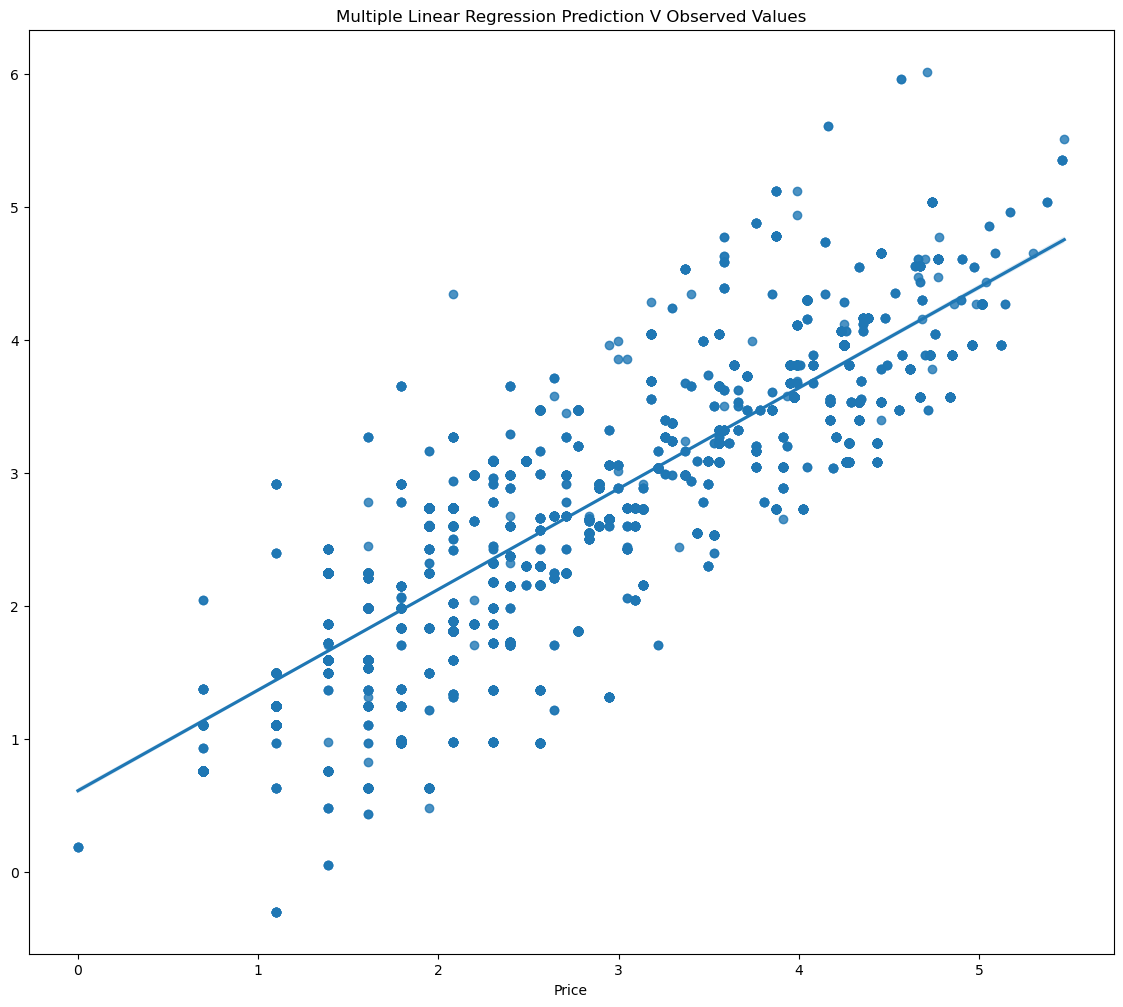

In [86]:
sns.regplot(x=y_test,y=pred).set(title='Multiple Linear Regression Prediction V Observed Values')

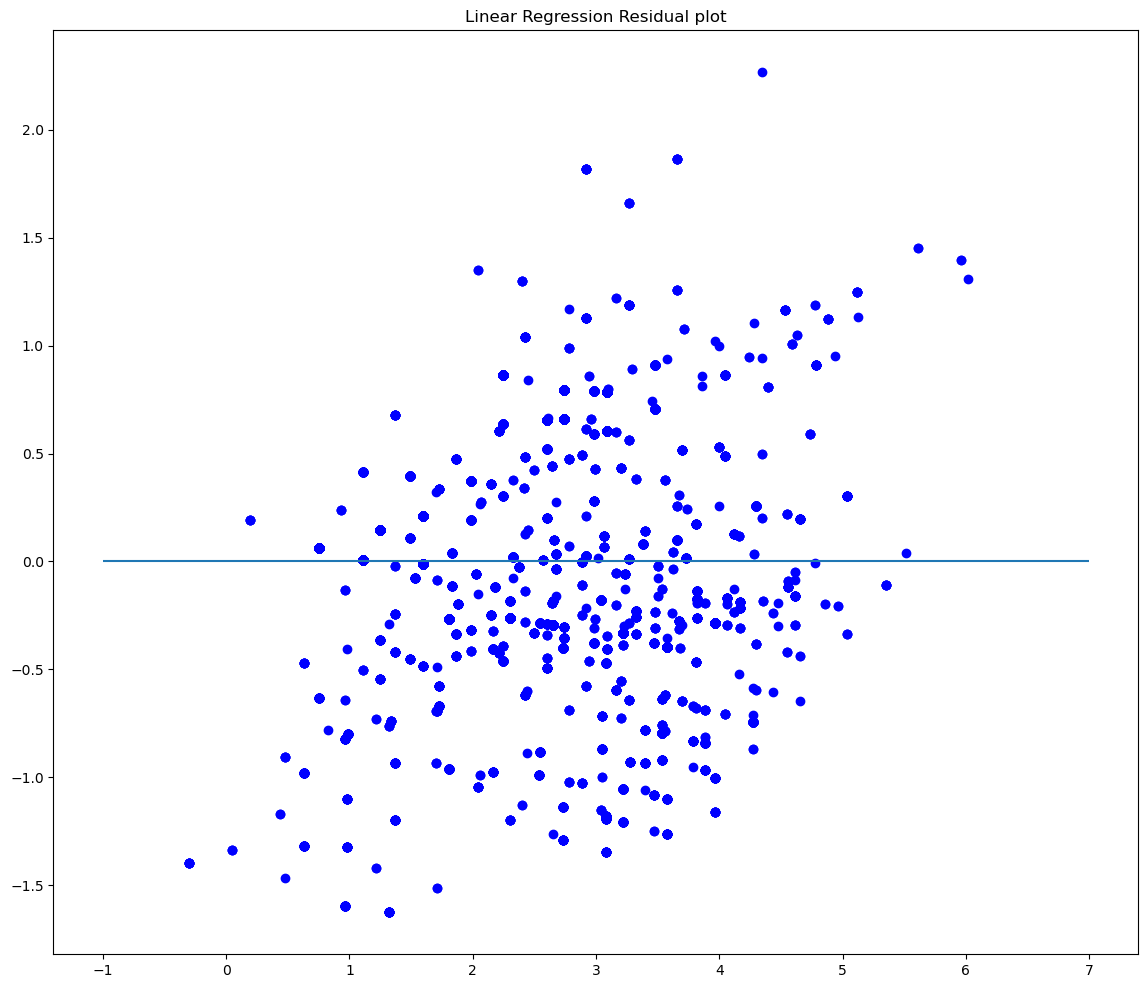

In [87]:
# residual plot - how randomly dispersed are our errors?
xmin = -1; xmax = 7
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Linear Regression Residual plot');

### Observation

The model seems to have fit the data quite well as it shows a good R^2 value of 75.6% and the RSME is considerably smaller than the standard deviation of the label. However, we should'nt be happy with this result as there could be a models that better models the dataset such as Decision Tree Regressor.

In [89]:
dtReg = DecisionTreeRegressor(random_state=0)
#Train the model
dtReg.fit(X_train_input,y_train)

DecisionTreeRegressor(random_state=0)

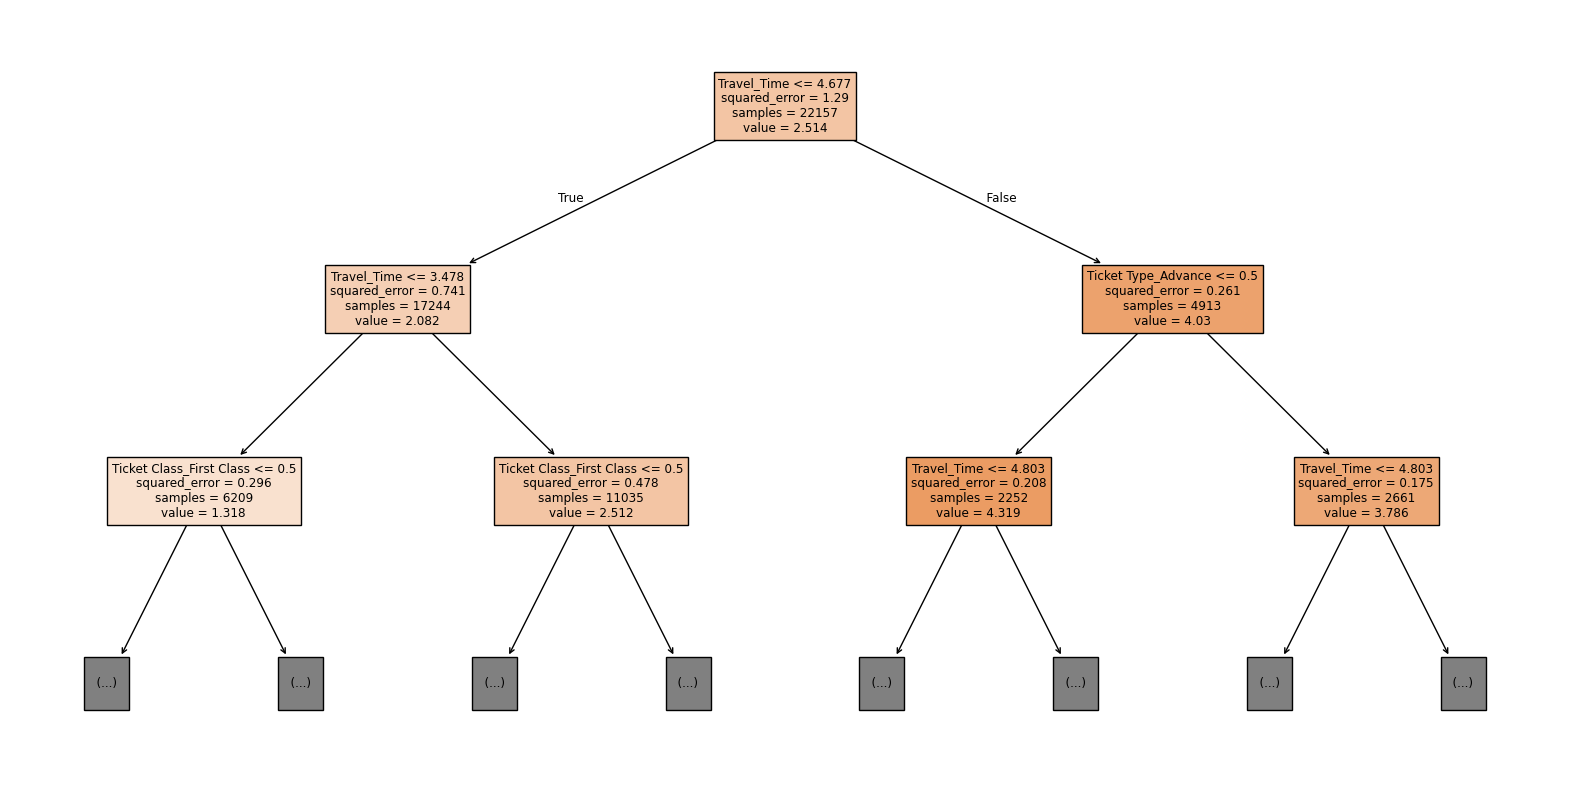

In [90]:
from sklearn.tree import plot_tree

features = list(X_train_input.columns)
plt.figure(figsize=(20,10))

plot_tree(dtReg,filled=True,feature_names=features,max_depth=2)

plt.show();

In [171]:
# Make predictions and measure performance
tree_pred = dtReg.predict(X_test)
pred_tree = [float(i) for i in tree_pred]
y_true = [i for i in y_test.values]
MSE = mean_squared_error(y_true,pred_tree )
RMSE = np.sqrt(MSE)
r2_ = r2_score(y_true,pred_tree)

print(f'The RMSE was: {RMSE}')
print(f'The R^2 value was: {r2_}')

The RMSE was: 0.28064447327218073
The R^2 value was: 0.9380256113097561


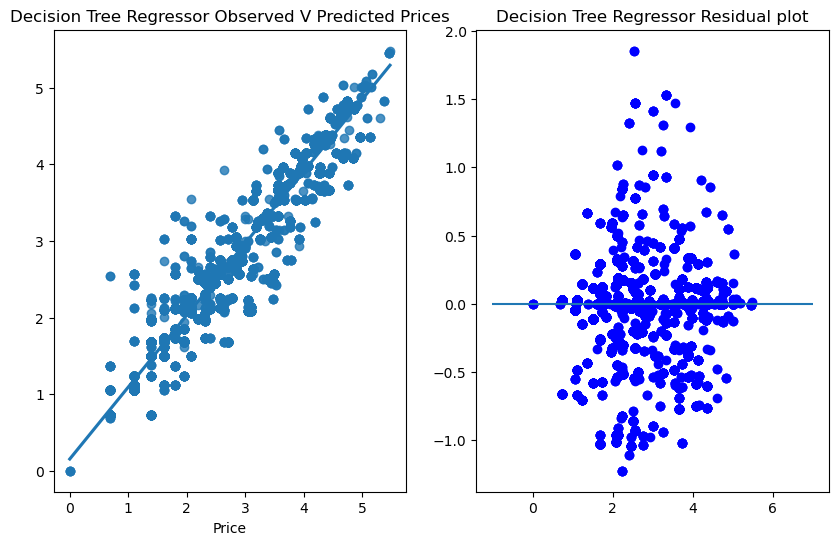

In [92]:
# Visualise the performance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.regplot(x=y_test,y=tree_pred,ax=axes[0]).set(title='Decision Tree Regressor Observed V Predicted Prices')


xmin = -1; xmax = 7
x_plot = plt.scatter(x=tree_pred,y=(tree_pred - y_test), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Decision Tree Regressor Residual plot');

In [93]:
# cross-validate for overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtReg, X_train_input, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print(f"Cross-validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

Cross-validated RMSE: 0.2815578942435436 ± 0.0051508823549218


## Observation

The Regression Tree has performed considerably better than the previous two models, where there is very little sign of overfitting due to the small variation in the RMSE from the cross-validation method. Furthermore, you can see the predictions plotted against the observed prices to which there is small variation, although there is some variation in the smaller prices.

